In [1]:
import pandas as pd
import numpy as np
from gpxutils import parse_gpx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_, _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero gradient but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per second
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [4]:
rr_2016.columns

Index(['latitude', 'longitude', 'elevation', 'temperature', 'power', 'cadence',
       'hr', 'distance', 'elevation_gain', 'speed', 'timedelta'],
      dtype='object')

In [5]:
rr_2016.dtypes

latitude          float64
longitude         float64
elevation         float64
temperature       float64
power             float64
cadence           float64
hr                float64
distance          float64
elevation_gain    float64
speed             float64
timedelta         float64
dtype: object

In [6]:
print(tt_2016.shape)
print(rr_2016.shape)
print(tt_2019.shape)
print(rr_2019.shape)

(1541, 11)
(2822, 11)
(2655, 11)
(5503, 11)


In [7]:
tt_2016_distance = tt_2016['distance'].sum()
tt_2016_time = tt_2016['timedelta'].sum()/(60*60)
tt_2016_avg_speed = tt_2016['speed'].mean()
rr_2016_distance = rr_2016['distance'].sum()
rr_2016_time = rr_2016['timedelta'].sum()/(60*60)
rr_2016_avg_speed = rr_2016['speed'].mean()

tt_2019_distance = tt_2019['distance'].sum()
tt_2019_time = tt_2019['timedelta'].sum()/(60*60)
tt_2019_avg_speed = tt_2019['speed'].mean()
rr_2019_distance = rr_2019['distance'].sum()
rr_2019_time = rr_2019['timedelta'].sum()/(60*60)
rr_2019_avg_speed = rr_2019['speed'].mean()

data = {'Distance':[tt_2016_distance, rr_2016_distance, tt_2019_distance, rr_2019_distance],
        'Time':[tt_2016_time, rr_2016_time, tt_2019_time, rr_2019_time],
        'Avg Speed':[tt_2016_avg_speed, rr_2016_avg_speed, tt_2019_avg_speed, rr_2019_avg_speed]
       }
 
cycling_data = pd.DataFrame(data, index =['tt_2016',
                                'rr_2016',
                                'tt_2019',
                                'rr_2019'])

pd.options.display.float_format = '{:.2f}'.format
cycling_data

,Distance,Time,Avg Speed
tt_2016,24.80,0.76,33.53
rr_2016,49.05,1.44,34.93
tt_2019,24.38,0.74,33.06
rr_2019,51.79,1.53,33.88


All the 4 races are done on same track. The time trial was done single lap while the road race was done 2 laps. We can see this fact the distance travelled in road race is approx. 2 times the time trial. Avg. speed is slightly better in the road race than time trial. Perhaps the road race is a competition to win the race has pushed up to achieve a higher speed. The rider did little better in 2016 than 2019. Possible reason might be the rider’s physical fitness has gone down over this period.

In [8]:
tt_2016_max_elevation = tt_2016.elevation.max()
tt_2016_max_speed = tt_2016.speed.max()
tt_2016_max_hr = tt_2016.hr.max()
tt_2016_wip = tt_2016.copy()

rr_2016_max_elevation = rr_2016.elevation.max()
rr_2016_max_speed = rr_2016.speed.max()
rr_2016_max_hr = rr_2016.hr.max()
rr_2016_wip = rr_2016.copy()

tt_2019_max_elevation = tt_2019.elevation.max()
tt_2019_max_speed = tt_2019.speed.max()
tt_2019_max_hr = tt_2019.hr.max()
tt_2019_wip = tt_2019.copy()

rr_2019_max_elevation = rr_2019.elevation.max()
rr_2019_max_speed = rr_2019.speed.max()
rr_2019_max_hr = rr_2019.hr.max()
rr_2019_wip = rr_2019.copy()

def calc_time_climbing(race):
    
    first = True
    times = {"time":[], "seconds":[]}
    start_unixtime = None
    climbing = [0]
    last_elevation = None

    for index, row in race.iterrows():
        times["time"].append(index)
        if first:
            times["seconds"].append(0)
            start_unixtime = index.timestamp()
            first = False
            climbing[0] = 0
            last_elevation = row.elevation
        else:
            times["seconds"].append(times["time"][-1].timestamp() - start_unixtime)

            if row.elevation_gain >= 0:
                climbing.append(climbing[-1] + row.elevation_gain)
            else:
                climbing.append(0)
            last_elevation = row.elevation
    return times["seconds"], climbing

tt_2016_wip["seconds"], tt_2016_wip["climbing"] = calc_time_climbing(tt_2016_wip)
tt_2016_wip = tt_2016_wip.reset_index()

rr_2016_wip["seconds"], rr_2016_wip["climbing"] = calc_time_climbing(rr_2016_wip)
rr_2016_wip = rr_2016_wip.reset_index()

tt_2019_wip["seconds"], tt_2019_wip["climbing"] = calc_time_climbing(tt_2019_wip)
tt_2019_wip = tt_2019_wip.reset_index()

rr_2019_wip["seconds"], rr_2019_wip["climbing"] = calc_time_climbing(rr_2019_wip)
rr_2019_wip = rr_2019_wip.reset_index()

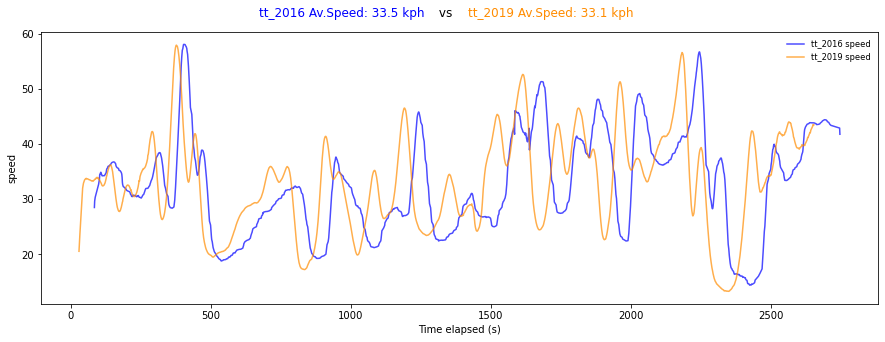

In [9]:
plt.figure(figsize=(15,5))
plt.plot(tt_2016_wip["seconds"], tt_2016_wip["speed"].rolling(window = 30).mean(), label = "tt_2016 speed",color = "blue", alpha = 0.7)
plt.plot(tt_2019_wip["seconds"], tt_2019_wip["speed"].rolling(window = 30).mean(), label = "tt_2019 speed",color = "darkorange", alpha = 0.7)
plt.legend(fontsize = "small", markerscale = 0.5, frameon = False)
plt.ylabel("speed")
plt.xlabel("Time elapsed (s)")
plt.figtext(0.48, 0.88, "tt_2016" + " Av.Speed: {:.1f} kph\n".format(np.mean(tt_2016_wip.speed)), fontsize='large', color='blue', ha ='right')
plt.figtext(0.52, 0.88, "tt_2019" + " Av.Speed: {:.1f} kph\n".format(np.mean(tt_2019_wip.speed)), fontsize='large', color='darkorange', ha ='left')
plt.figtext(0.50, 0.922, ' vs ', fontsize='large', color='k', ha ='center')
plt.show()

The curve plots the speed at different time-lapse period. Speed and elevation have an inverse relationship. The spike in speed the decanting elevation segment of the track and the deep of the curve is climbing elevation segment. The curve shows the decanting speed is little better in 2019 time trial than 2016 time trail. On the other hand, the deep of the curve shows the speed in 2016 is slightly better than 2019 speed. The overall avg speed on 2016 is slightly better than 2019.

In [10]:
tt_2016_distance_climb = tt_2016_wip[tt_2016_wip["elevation_gain"] > 0.2]['distance'].sum()
tt_2016_time_climb = tt_2016_wip[tt_2016_wip["elevation_gain"] > 0.2]['timedelta'].sum()/(60*60)
tt_2016_climb_avg_speed = tt_2016_distance_climb / tt_2016_time_climb

tt_2016_distance_flat = tt_2016_wip[(tt_2016_wip["elevation_gain"] >= -0.2) & (tt_2016_wip["elevation_gain"] <= 0.2)]['distance'].sum()
tt_2016_time_flat = tt_2016_wip[(tt_2016_wip["elevation_gain"] >= -0.2) & (tt_2016_wip["elevation_gain"] <= 0.2)]['timedelta'].sum()/(60*60)
tt_2016_flat_avg_speed = tt_2016_distance_flat / tt_2016_time_flat

tt_2016_distance_desc = tt_2016_wip[tt_2016_wip["elevation_gain"] < -0.2]['distance'].sum()
tt_2016_time_desc = tt_2016_wip[tt_2016_wip["elevation_gain"] < -0.2]['timedelta'].sum()/(60*60)
tt_2016_desc_avg_speed = tt_2016_distance_desc / tt_2016_time_desc

rr_2016_distance_climb = rr_2016_wip[rr_2016_wip["elevation_gain"] > 0.2]['distance'].sum()
rr_2016_time_climb = rr_2016_wip[rr_2016_wip["elevation_gain"] > 0.2]['timedelta'].sum()/(60*60)
rr_2016_climb_avg_speed = rr_2016_distance_climb / rr_2016_time_climb

rr_2016_distance_flat = rr_2016_wip[(rr_2016_wip["elevation_gain"] >= -0.2) & (rr_2016_wip["elevation_gain"] <= 0.2)]['distance'].sum()
rr_2016_time_flat = rr_2016_wip[(rr_2016_wip["elevation_gain"] >= -0.2) & (rr_2016_wip["elevation_gain"] <= 0.2)]['timedelta'].sum()/(60*60)
rr_2016_flat_avg_speed = rr_2016_distance_flat / rr_2016_time_flat

rr_2016_distance_desc = rr_2016_wip[rr_2016_wip["elevation_gain"] < -0.2]['distance'].sum()
rr_2016_time_desc = rr_2016_wip[rr_2016_wip["elevation_gain"] < -0.2]['timedelta'].sum()/(60*60)
rr_2016_desc_avg_speed = rr_2016_distance_desc / rr_2016_time_desc


tt_2019_distance_climb = tt_2019_wip[tt_2019_wip["elevation_gain"] > 0.2]['distance'].sum()
tt_2019_time_climb = tt_2019_wip[tt_2019_wip["elevation_gain"] > 0.2]['timedelta'].sum()/(60*60)
tt_2019_climb_avg_speed = tt_2019_wip[tt_2019_wip["elevation_gain"] > 0.2]['distance'].sum()/(tt_2019['timedelta'].sum()/(60*60))

tt_2019_distance_flat = tt_2019_wip[(tt_2019_wip["elevation_gain"] >= -0.2) & (tt_2019_wip["elevation_gain"] <= 0.2)]['distance'].sum()
tt_2019_time_flat = tt_2019_wip[(tt_2019_wip["elevation_gain"] >= -0.2) & (tt_2019_wip["elevation_gain"] <= 0.2)]['timedelta'].sum()/(60*60)
tt_2019_flat_avg_speed = tt_2019_distance_climb / tt_2019_time_flat

tt_2019_distance_desc = tt_2019_wip[tt_2019_wip["elevation_gain"] < -0.2]['distance'].sum()
tt_2019_time_desc = tt_2019_wip[tt_2019_wip["elevation_gain"] < -0.2]['timedelta'].sum()/(60*60)
tt_2019_desc_avg_speed = tt_2019_distance_desc / tt_2019_time_desc

rr_2019_distance_climb = rr_2019_wip[rr_2019_wip["elevation_gain"] > 0.2]['distance'].sum()
rr_2019_time_climb = rr_2019_wip[rr_2019_wip["elevation_gain"] > 0.2]['timedelta'].sum()/(60*60)
rr_2019_climb_avg_speed = rr_2019_distance_climb / rr_2019_time_climb

rr_2019_distance_flat = rr_2019_wip[(rr_2019_wip["elevation_gain"] >= -0.2) & (rr_2019_wip["elevation_gain"] <= 0.2)]['distance'].sum()
rr_2019_time_flat = rr_2019_wip[(rr_2019_wip["elevation_gain"] >= -0.2) & (rr_2019_wip["elevation_gain"] <= 0.2)]['timedelta'].sum()/(60*60)
rr_2019_flat_avg_speed = rr_2019_distance_flat / rr_2019_time_flat

rr_2019_distance_desc = rr_2019_wip[rr_2019_wip["elevation_gain"] < -0.2]['distance'].sum()
rr_2019_time_desc = rr_2019_wip[rr_2019_wip["elevation_gain"] < -0.2]['timedelta'].sum()/(60*60)
rr_2019_desc_avg_speed = rr_2019_distance_desc / rr_2019_time_desc



columns1 = pd.MultiIndex.from_tuples(
    [("climb", "Distance"), ("climb", "Time"), ("climb", "Avg Speed"),
     ("flat", "Distance"), ("flat", "Time"), ("flat", "Avg Speed"),
     ("desc", "Distance"), ("desc", "Time"), ("desc", "Avg Speed")
    ]
)

cycling_data = pd.DataFrame([[tt_2016_distance_climb, tt_2016_time_climb, tt_2016_climb_avg_speed, tt_2016_distance_flat, tt_2016_time_flat, tt_2016_flat_avg_speed, tt_2016_distance_desc, tt_2016_time_desc, tt_2016_desc_avg_speed],
              [rr_2016_distance_climb, rr_2016_time_climb, rr_2016_climb_avg_speed, rr_2016_distance_flat, rr_2016_time_flat, rr_2016_flat_avg_speed, rr_2016_distance_desc, rr_2016_time_desc, rr_2016_desc_avg_speed],
              [tt_2019_distance_climb, tt_2019_time_climb, tt_2019_climb_avg_speed, tt_2019_distance_flat, tt_2019_time_flat, tt_2019_flat_avg_speed, tt_2019_distance_desc, tt_2019_time_desc, tt_2019_desc_avg_speed],
              [rr_2019_distance_climb, rr_2019_time_climb, rr_2019_climb_avg_speed, rr_2019_distance_flat, rr_2019_time_flat, rr_2019_flat_avg_speed, rr_2019_distance_desc, rr_2019_time_desc, rr_2019_desc_avg_speed]
             ], index =['tt_2016', 'rr_2016', 'tt_2019', 'rr_2019'],
                            columns=columns1
            )

pd.options.display.float_format = '{:.2f}'.format
cycling_data

climb                    flat                    desc       \
        Distance Time Avg Speed Distance Time Avg Speed Distance Time   
tt_2016     5.89 0.24     24.48    11.91 0.36     33.07     7.01 0.16   
rr_2016    11.23 0.42     26.63    24.47 0.73     33.67    13.35 0.30   
tt_2019     3.84 0.15      5.21    14.38 0.45      8.59     6.16 0.14   
rr_2019    10.83 0.38     28.32    27.20 0.83     32.77    13.76 0.32   

                   
        Avg Speed  
tt_2016     43.13  
rr_2016     45.11  
tt_2019     45.07  
rr_2019     43.56

Calculation the flat segment we have considered a little tolerance in elevation. For instance, track segment of -0.2 <= elevation <= 0.2 we have considered as flat segment rather than absolute 0 elevation. As natural when climbing speed is lowest and when flat speed is normal and when descend with the aid of gravity speed is high.

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see mamy points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



In [11]:
tt_2016_wip = tt_2016_wip.drop(tt_2016_wip[tt_2016_wip['cadence']==0].index)
tt_2016_wip['development'] = (tt_2016_wip['speed']*1000/60)/tt_2016_wip['cadence']
tt_2016_wip = tt_2016_wip.drop(tt_2016_wip[tt_2016_wip['development']>10 ].index)

tt_2019_wip = tt_2019_wip.drop(tt_2019_wip[tt_2019_wip['cadence']==0].index)
tt_2019_wip['development'] = (tt_2019_wip['speed']*1000/60)/tt_2019_wip['cadence']
tt_2019_wip = tt_2019_wip.drop(tt_2019_wip[tt_2019_wip['development']>10 ].index)

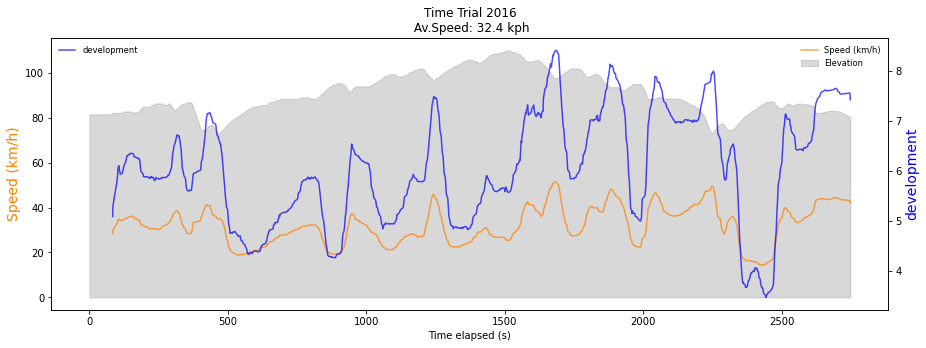

In [12]:
fig,ax = plt.subplots(figsize=(15,5))
ax.fill_between(tt_2016_wip["seconds"],y1=(tt_2016_wip.elevation/rr_2016_max_elevation * rr_2016_max_speed)+(rr_2016_max_speed/2), y2=0,alpha = 0.3,label = "Elevation", color = "gray")
ax.plot(tt_2016_wip["seconds"], tt_2016_wip["speed"].rolling(window = 30).mean(), label = "Speed (km/h)",color = "#ff7f00", alpha = 0.7)

ax.set_ylabel("Speed (km/h)",color="#ff7f00",fontsize=14)
ax.set_xlabel("Time elapsed (s)")
ax.legend(fontsize = "small", markerscale = 0.5, frameon = False)

ax2=ax.twinx()
plt.plot(tt_2016_wip["seconds"], tt_2016_wip["development"].rolling(window = 30).mean(), label = "development",color = "blue", alpha = 0.7)
ax2.set_ylabel("development",color="blue",fontsize=14)
ax2.legend(fontsize = "small", markerscale = 0.5, frameon = False, loc='upper left')

plt.title("Time Trial 2016" + "\n Av.Speed: {:.1f} kph".format(np.mean(tt_2016_wip.speed)))
plt.show()

High development helps climbing at the expense of speed. Low development helps acceleration hance achieve high speed. In case of decent the gear is put into low development. When we closely observe the plot, we can clearly see the fact. The Gray shaded area is showing the elevation level of the track. We can see when climbing the development is going high in blue line and the speed is going down in yellow line. On the other side when decent we can see the development is going down and speed is going high. 

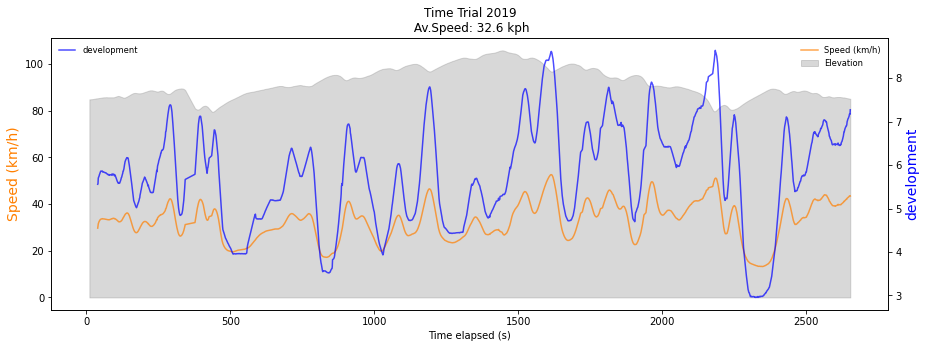

In [13]:
fig,ax = plt.subplots(figsize=(15,5))
ax.fill_between(tt_2019_wip["seconds"],y1=(tt_2019_wip.elevation/rr_2019_max_elevation * rr_2019_max_speed)+(rr_2019_max_speed/2), y2=0,alpha = 0.3,label = "Elevation", color = "gray")
ax.plot(tt_2019_wip["seconds"], tt_2019_wip["speed"].rolling(window = 30).mean(), label = "Speed (km/h)",color = "#ff7f00", alpha = 0.7)

ax.set_ylabel("Speed (km/h)",color="#ff7f00",fontsize=14)
ax.set_xlabel("Time elapsed (s)")
ax.legend(fontsize = "small", markerscale = 0.5, frameon = False)

ax2=ax.twinx()
plt.plot(tt_2019_wip["seconds"], tt_2019_wip["development"].rolling(window = 30).mean(), label = "development",color = "blue", alpha = 0.7)
ax2.set_ylabel("development",color="blue",fontsize=14)
ax2.legend(fontsize = "small", markerscale = 0.5, frameon = False, loc='upper left')

plt.title("Time Trial 2019" + "\n Av.Speed: {:.1f} kph".format(np.mean(tt_2019_wip.speed)))
plt.show()

Time Trial 2019 development is shifting more frequently than Time Trial 2016. We can see the fact if we closely observe the blue line in this plot and the plot above.

In [14]:
rr_2016_wip = rr_2016_wip.drop(rr_2016_wip[rr_2016_wip['cadence']==0].index)
rr_2016_wip['development'] = (rr_2016_wip['speed']*1000/60)/rr_2016_wip['cadence']
rr_2016_wip = rr_2016_wip.drop(rr_2016_wip[rr_2016_wip['development']>10 ].index)

rr_2019_wip = rr_2019_wip.drop(rr_2019_wip[rr_2019_wip['cadence']==0].index)
rr_2019_wip['development'] = (rr_2019_wip['speed']*1000/60)/rr_2019_wip['cadence']
rr_2019_wip = rr_2019_wip.drop(rr_2019_wip[rr_2019_wip['development']>10 ].index)

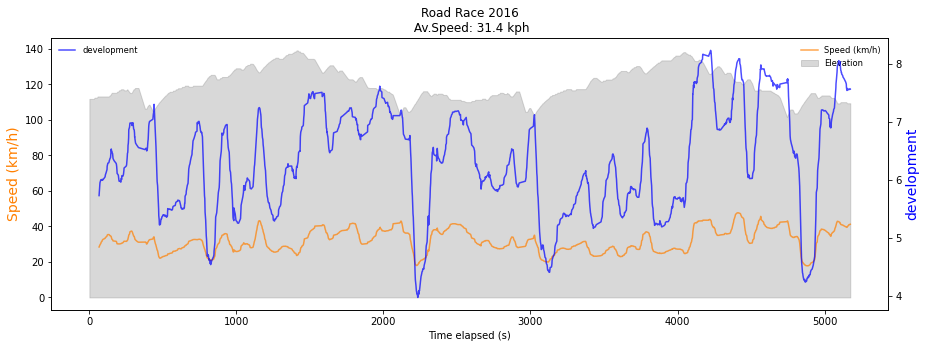

In [15]:
fig,ax = plt.subplots(figsize=(15,5))
ax.fill_between(rr_2016_wip["seconds"],y1=(rr_2016_wip.elevation/rr_2016_max_elevation * rr_2016_max_speed)+(rr_2016_max_speed/2), y2=0,alpha = 0.3,label = "Elevation", color = "gray")
ax.plot(rr_2016_wip["seconds"], rr_2016_wip["speed"].rolling(window = 30).mean(), label = "Speed (km/h)",color = "#ff7f00", alpha = 0.7)

ax.set_ylabel("Speed (km/h)",color="#ff7f00",fontsize=14)
ax.set_xlabel("Time elapsed (s)")
ax.legend(fontsize = "small", markerscale = 0.5, frameon = False)

ax2=ax.twinx()
plt.plot(rr_2016_wip["seconds"], rr_2016_wip["development"].rolling(window = 30).mean(), label = "development",color = "blue", alpha = 0.7)
ax2.set_ylabel("development",color="blue",fontsize=14)
ax2.legend(fontsize = "small", markerscale = 0.5, frameon = False, loc='upper left')

plt.title("Road Race 2016" + "\n Av.Speed: {:.1f} kph".format(np.mean(rr_2016_wip.speed)))
plt.show()

Road Race 2016 is development is shifting more frequently towards end of the race. Could be at the end of the race the rider is trying hard to win the race.

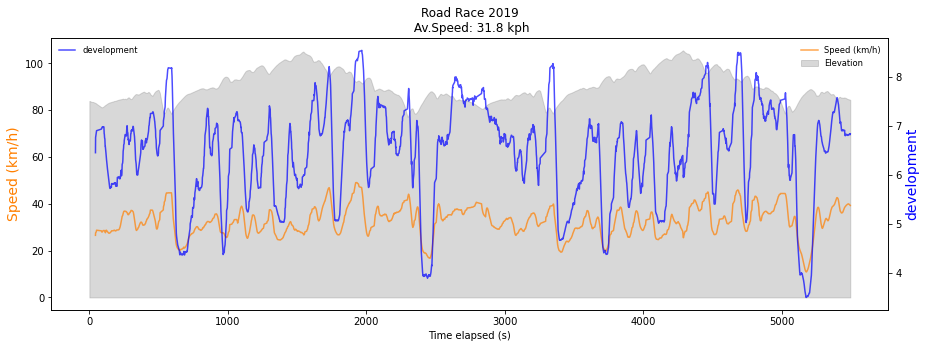

In [16]:
fig,ax = plt.subplots(figsize=(15,5))
ax.fill_between(rr_2019_wip["seconds"],y1=(rr_2019_wip.elevation/rr_2019_max_elevation * rr_2019_max_speed)+(rr_2019_max_speed/2), y2=0,alpha = 0.3,label = "Elevation", color = "gray")
ax.plot(rr_2019_wip["seconds"], rr_2019_wip["speed"].rolling(window = 30).mean(), label = "Speed (km/h)",color = "#ff7f00", alpha = 0.7)

ax.set_ylabel("Speed (km/h)",color="#ff7f00",fontsize=14)
ax.set_xlabel("Time elapsed (s)")
ax.legend(fontsize = "small", markerscale = 0.5, frameon = False)

ax2=ax.twinx()
plt.plot(rr_2019_wip["seconds"], rr_2019_wip["development"].rolling(window = 30).mean(), label = "development",color = "blue", alpha = 0.7)
ax2.set_ylabel("development",color="blue",fontsize=14)
ax2.legend(fontsize = "small", markerscale = 0.5, frameon = False, loc='upper left')

plt.title("Road Race 2019" + "\n Av.Speed: {:.1f} kph".format(np.mean(rr_2019_wip.speed)))
plt.show()

The 2019 road race shows the development is shifting more frequently than 2016 road race. Cycling is all about the effective usage of gear. The plot shows the rider has improved the skill of gear usage to a great deal over this period.

From the overall data analysed we can find an interesting finding that the rider’s overall fitness is not improved or remained at the same level but the rider’s skill has improved a lot.